In [2]:
import pandas as pd
import numpy as np

In [3]:
dict_1={
    'Nombre':['Ringo','John','Paul','George','Yoko'],
    'Edad':[45,34,42,38,47],
    'Salario':[12000,14000,13000,11000,10000],
    'Genero':['M','M','M','M','F']
}

In [4]:
df=pd.DataFrame(dict_1)
df

,Nombre,Edad,Salario,Genero
0,Ringo,45,12000,M
1,John,34,14000,M
2,Paul,42,13000,M
3,George,38,11000,M
4,Yoko,47,10000,F


In [5]:
df_cat=df.select_dtypes(include=['object','category'])
df_num=df.select_dtypes(exclude=['object','category'])

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

# definir atributos
num_attrib=df_num.columns.tolist()
cat_attrib=df_cat.columns.tolist()

# definir pipeline
full_pipe=ColumnTransformer([('num',MinMaxScaler(),num_attrib),
                            ('cat',OneHotEncoder(sparse=False,drop='first'),cat_attrib)])
pd.DataFrame(full_pipe.fit_transform(df),columns=num_attrib+pd.get_dummies(df_cat,drop_first=True).columns.tolist())

,Edad,Salario,Nombre_John,Nombre_Paul,Nombre_Ringo,Nombre_Yoko,Genero_M
0,0.846154,0.50,0.0,0.0,1.0,0.0,1.0
1,0.000000,1.00,1.0,0.0,0.0,0.0,1.0
2,0.615385,0.75,0.0,1.0,0.0,0.0,1.0
3,0.307692,0.25,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.00,0.0,0.0,0.0,1.0,0.0


Metodos

In [7]:
df.describe(include='all')

,Nombre,Edad,Salario,Genero
count,5,5.000000,5.00000,5
unique,5,NaN,NaN,2
top,Ringo,NaN,NaN,M
freq,1,NaN,NaN,4
mean,NaN,41.200000,12000.00000,NaN
std,NaN,5.263079,1581.13883,NaN
min,NaN,34.000000,10000.00000,NaN
25%,NaN,38.000000,11000.00000,NaN
50%,NaN,42.000000,12000.00000,NaN
75%,NaN,45.000000,13000.00000,NaN


In [8]:
df.std(numeric_only=True)

Edad          5.263079
Salario    1581.138830
dtype: float64

In [9]:
df.sum()

Nombre     RingoJohnPaulGeorgeYoko
Edad                           206
Salario                      60000
Genero                       MMMMF
dtype: object

In [10]:
df.median()

Edad          42.0
Salario    12000.0
dtype: float64

In [11]:
df.max()

Nombre      Yoko
Edad          47
Salario    14000
Genero         M
dtype: object

In [12]:
df.min()

Nombre     George
Edad           34
Salario     10000
Genero          F
dtype: object

In [13]:
df.loc[df.Edad==df.Edad.min()]

,Nombre,Edad,Salario,Genero
1,John,34,14000,M


In [14]:
df.Edad.abs()

0    45
1    34
2    42
3    38
4    47
Name: Edad, dtype: int64

In [15]:
df.prod(numeric_only=True)

Edad                114768360
Salario    432327041775828992
dtype: int64

In [16]:
df.cumsum()

,Nombre,Edad,Salario,Genero
0,Ringo,45,12000,M
1,RingoJohn,79,26000,MM
2,RingoJohnPaul,121,39000,MMM
3,RingoJohnPaulGeorge,159,50000,MMMM
4,RingoJohnPaulGeorgeYoko,206,60000,MMMMF


In [17]:
df.Edad.cumsum()

0     45
1     79
2    121
3    159
4    206
Name: Edad, dtype: int64

In [18]:
df.Edad.cumprod()

0           45
1         1530
2        64260
3      2441880
4    114768360
Name: Edad, dtype: int64

In [19]:
df.dtypes

Nombre     object
Edad        int64
Salario     int64
Genero     object
dtype: object

In [20]:
df_dummies=pd.get_dummies(df[['Genero']])
df_dummies

,Genero_F,Genero_M
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [21]:
df_dummies.value_counts()

Genero_F  Genero_M
0         1           4
1         0           1
dtype: int64

array([[<AxesSubplot:title={'center':'Edad'}>,
        <AxesSubplot:title={'center':'Salario'}>]], dtype=object)

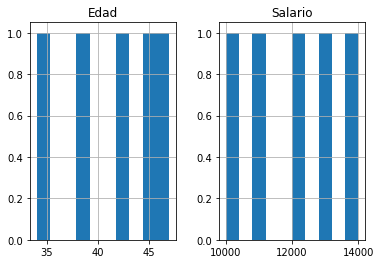

In [22]:
df.hist()

<AxesSubplot:>

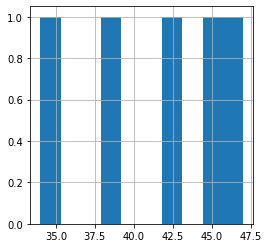

In [25]:
df.Edad.hist(figsize=(4,4))

In [23]:
import matplotlib.pyplot as plt

<AxesSubplot:>

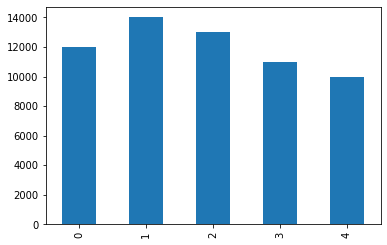

In [27]:
df.Salario.plot(kind='bar')

<AxesSubplot:>

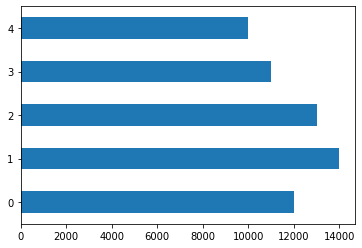

In [28]:
df.Salario.plot(kind='barh')

<AxesSubplot:>

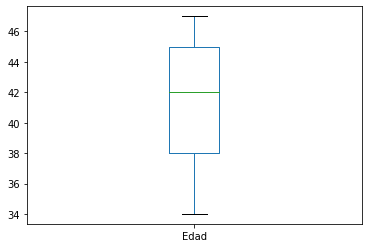

In [29]:
df.Edad.plot(kind='box')

In [30]:
df_sorted=df.sort_values(by='Salario',ascending=False)
df_sorted

,Nombre,Edad,Salario,Genero
1,John,34,14000,M
2,Paul,42,13000,M
0,Ringo,45,12000,M
3,George,38,11000,M
4,Yoko,47,10000,F


<AxesSubplot:>

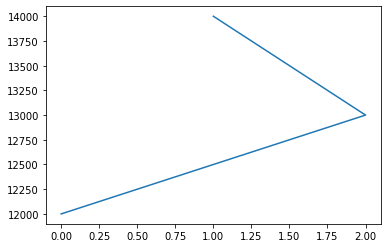

In [31]:
df_sorted.Salario.head(3).plot()

In [65]:
data=pd.read_csv('datasets/athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [66]:
ejer_clase=data[['Year','Season','Medal','NOC']]
ejer_clase.head()

,Year,Season,Medal,NOC
0,1992,Summer,NaN,CHN
1,2012,Summer,NaN,CHN
2,1920,Summer,NaN,DEN
3,1900,Summer,Gold,DEN
4,1988,Winter,NaN,NED


In [67]:
df_dummies=pd.get_dummies(ejer_clase,columns=['Medal'])
df_dummies['Medal']=ejer_clase['Medal']
df_dummies.head()

,Year,Season,NOC,Medal_Bronze,Medal_Gold,Medal_Silver,Medal
0,1992,Summer,CHN,0,0,0,NaN
1,2012,Summer,CHN,0,0,0,NaN
2,1920,Summer,DEN,0,0,0,NaN
3,1900,Summer,DEN,0,1,0,Gold
4,1988,Winter,NED,0,0,0,NaN


In [68]:
agrupado=df_dummies.groupby(['Year','Medal','Season']).sum()
agrupado.head(8)

Medal_Bronze  Medal_Gold  Medal_Silver
Year Medal  Season                                        
1896 Bronze Summer          38.0         0.0           0.0
     Gold   Summer           0.0        62.0           0.0
     Silver Summer           0.0         0.0          43.0
1900 Bronze Summer         175.0         0.0           0.0
     Gold   Summer           0.0       201.0           0.0
     Silver Summer           0.0         0.0         228.0
1904 Bronze Summer         150.0         0.0           0.0
     Gold   Summer           0.0       173.0           0.0

In [69]:
import seaborn as sns
pearson=agrupado.corr()
pearson.style.background_gradient(cmap='coolwarm')

,Medal_Bronze,Medal_Gold,Medal_Silver
Medal_Bronze,1.000000,-0.258015,-0.257368
Medal_Gold,-0.258015,1.000000,-0.263463
Medal_Silver,-0.257368,-0.263463,1.000000


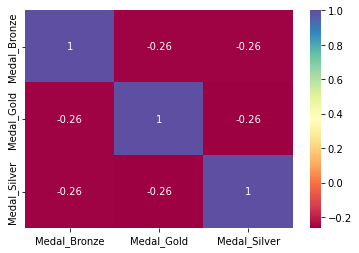

In [70]:
import seaborn as sns
pearson=agrupado.corr()
sns.heatmap(pearson,annot=True,cmap='Spectral')
plt.show()

In [71]:
pearson=data.corr()
pearson.style.background_gradient(cmap='coolwarm')

,ID,Age,Height,Weight,Year
ID,1.000000,-0.003631,-0.011141,-0.009176,0.011885
Age,-0.003631,1.000000,0.138246,0.212069,-0.115137
Height,-0.011141,0.138246,1.000000,0.796213,0.047578
Weight,-0.009176,0.212069,0.796213,1.000000,0.019095
Year,0.011885,-0.115137,0.047578,0.019095,1.000000


In [72]:
agrupado['Total_medals']=agrupado[['Medal_Bronze','Medal_Gold','Medal_Silver']].sum(axis=1)
agrupado

Medal_Bronze  Medal_Gold  Medal_Silver  Total_medals
Year Medal  Season                                                      
1896 Bronze Summer          38.0         0.0           0.0          38.0
     Gold   Summer           0.0        62.0           0.0          62.0
     Silver Summer           0.0         0.0          43.0          43.0
1900 Bronze Summer         175.0         0.0           0.0         175.0
     Gold   Summer           0.0       201.0           0.0         201.0
...                          ...         ...           ...           ...
2014 Gold   Winter           0.0       202.0           0.0         202.0
     Silver Winter           0.0         0.0         197.0         197.0
2016 Bronze Summer         703.0         0.0           0.0         703.0
     Gold   Summer           0.0       665.0           0.0         665.0
     Silver Summer           0.0         0.0         655.0         655.0

[153 rows x 4 columns]

In [81]:
import matplotlib.pyplot as plt

def labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.3,y[i])

In [82]:
x=['Ringo','John','Paul','George','Yoko']
y=[45,34,42,48,47]

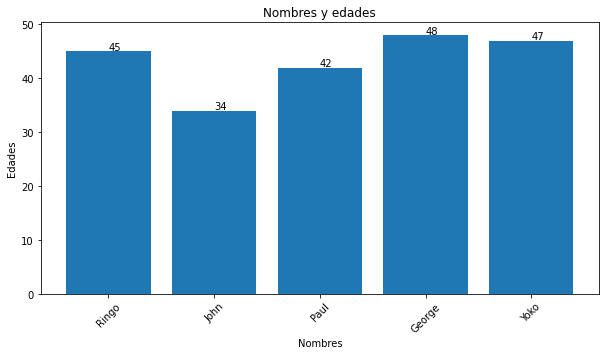

In [84]:
plt.figure(figsize=(10,5))
plt.bar(x,y)
labels(x,y)
plt.title('Nombres y edades')
plt.xlabel('Nombres')
plt.ylabel('Edades')
plt.xticks(rotation=45)
plt.show()

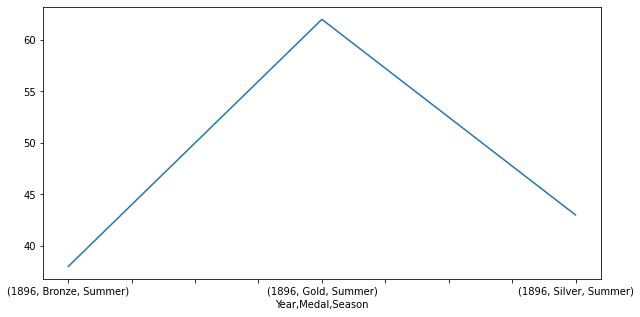

In [87]:
ax=agrupado[:3]['Total_medals'].plot(figsize=(10,5))
fig=ax.get_figure()
fig.savefig('imagenes/medallas.png')